In [1]:
import pandas as pd
import numpy as np

import sys
import os

from pathlib import Path
import librosa
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, normalize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

In [2]:
import features_1d as ft

In [3]:
emofilm_uk_df = pd.read_csv('D:/Documents/emofilm/data/emofilm_uk_df.csv')
emofilm_df = pd.read_csv('D:/Documents/emofilm_df.csv')
ravdess_df = pd.read_csv('D:/Documents/ravdess_df.csv')
savee_df = pd.read_csv('D:/Documents/savee_df.csv')
tess_df = pd.read_csv('D:/Documents/tess_df.csv')
cremad_df = pd.read_csv('D:/Documents/cremad_df.csv')

In [4]:
data_df = pd.concat([emofilm_df, emofilm_uk_df],
                    axis=0, ignore_index=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  1141 non-null   object
 1   path     1141 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [5]:
a, sr = librosa.load(data_df.path[1])
width = int(3 * sr)
a = librosa.util.fix_length(a, size=width)

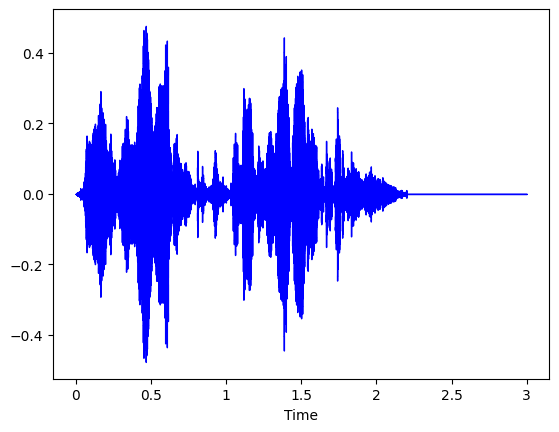

In [6]:
librosa.display.waveshow(a, sr=sr, color="blue")
plt.show()

In [7]:
stft = np.abs(librosa.stft(a))
stft_db = librosa.amplitude_to_db(stft, ref=np.max)
stft_abs = np.abs(librosa.stft(a))
chroma_stft = librosa.feature.chroma_stft(y=a, sr=sr)
chroma_stft_mean = np.mean(librosa.feature.chroma_stft(
    S=stft, sr=sr), axis=0)
chroma_stft_mean_t = np.mean(librosa.feature.chroma_stft(
    S=stft, sr=sr).T, axis=0)

print(stft.shape, stft_abs.shape, chroma_stft.shape,
      chroma_stft_mean.shape, chroma_stft_mean_t.shape)

(1025, 130) (1025, 130) (12, 130) (130,) (12,)


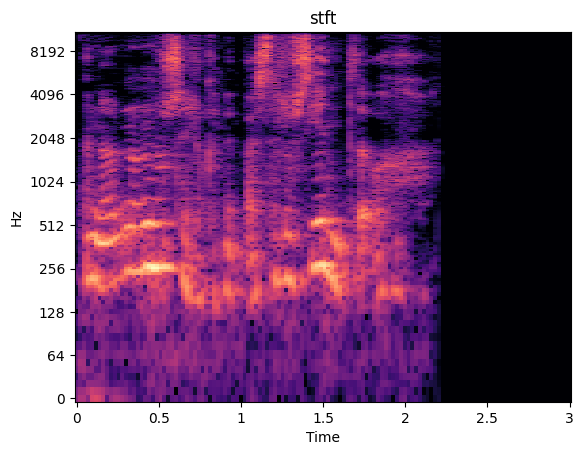

In [8]:
librosa.display.specshow(stft_db, sr=sr, y_axis='log', x_axis='time')
plt.title("stft")
plt.show()

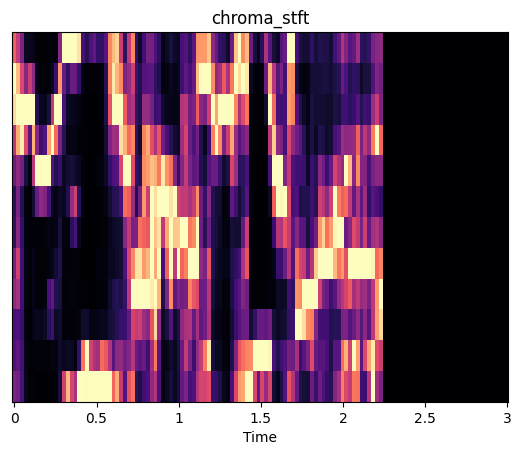

In [9]:
librosa.display.specshow(chroma_stft, sr=sr, x_axis='time')
plt.title("chroma_stft")
plt.show()

In [10]:
t = ft.extract_features_1d_v2(a, sr)
print(t.shape)

(130,)
(130,)
(130,)
(390,)
